# 4.10: Coding Etiquette (Part-1)

## Table Of Contents:

#### Import Libraries and Dataframes
#### Create regional segmentation of data
#### Create an exclusion flag for low-activity customers
#### Generate Customer profiling Variables
#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### Region and Department based comparison between customer profiles
#### Determine whether there’s a difference in spending habits between the different U.S. regions
#### Visualizations


#### Submitted by: Samarjit Gehdu

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Create a path
path = '/Users/samarjitgehdu/Documents/Python/Instacart Basket Analysis'

In [7]:
# Importing Dataframe
Merged_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [8]:
# Verify the imported dataframe
Merged_df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
5,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
6,2398795,1,2,3,7,15.0,10258,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
7,2398795,1,2,3,7,15.0,12427,3,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2398795,1,2,3,7,15.0,13176,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2398795,1,2,3,7,15.0,26088,5,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


### Create a regional segmentation of the data by creating a 'Region' Column based on the 'State' Column from the dataframe.

In [12]:
# Allocating the Divison 1 and 2 to the Northeast Region
# Division 1
Merged_df.loc[Merged_df['State'] == 'Maine', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'New Hampshire', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'Vermont', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'Massachusetts', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'Rhode Island', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'Connecticut', 'Region'] = 'Northeast'
# Division 2
Merged_df.loc[Merged_df['State'] == 'New York', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'Pennsylvania', 'Region'] = 'Northeast'
Merged_df.loc[Merged_df['State'] == 'New Jersey', 'Region'] = 'Northeast'

In [14]:
# Allocating the Division  3 and 4 to the Midwest Region
# Division 3
Merged_df.loc[Merged_df['State'] == 'Wisconsin', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Michigan', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Illinois', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Indiana', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Ohio', 'Region'] = 'Midwest'
# Division 4
Merged_df.loc[Merged_df['State'] == 'North Dakota', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'South Dakota', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Nebraska', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Kansas', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Minnesota', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Iowa', 'Region'] = 'Midwest'
Merged_df.loc[Merged_df['State'] == 'Missouri', 'Region'] = 'Midwest'

In [16]:
# Allocating the Division 5, 6 and 7 to the South Region
# Division 5
Merged_df.loc[Merged_df['State'] == 'Delaware', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Maryland', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'District of Columbia', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Virginia', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'West Virginia', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'North Carolina', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'South Carolina', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Georgia', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Florida', 'Region'] = 'South'
# Division 6
Merged_df.loc[Merged_df['State'] == 'Kentucky', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Tennessee', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Mississippi', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Alabama', 'Region'] = 'South'
# Division 7
Merged_df.loc[Merged_df['State'] == 'Oklahoma', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Texas', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Arkansas', 'Region'] = 'South'
Merged_df.loc[Merged_df['State'] == 'Louisiana', 'Region'] = 'South'

In [18]:
# Allocating the Division 8 and 9 to the West Region
# Division 8
Merged_df.loc[Merged_df['State'] == 'Idaho', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Montana', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Wyoming', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Nevada', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Utah', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Colorado', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Arizona', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'New Mexico', 'Region'] = 'West'
# Division 9
Merged_df.loc[Merged_df['State'] == 'Alaska', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Washington', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Oregon', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'California', 'Region'] = 'West'
Merged_df.loc[Merged_df['State'] == 'Hawaii', 'Region'] = 'West'

In [20]:
# Verify the Allocation of the 'Region' column in the Dataframe
Merged_df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
5,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
6,2398795,1,2,3,7,15.0,10258,2,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
7,2398795,1,2,3,7,15.0,12427,3,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2398795,1,2,3,7,15.0,13176,4,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
9,2398795,1,2,3,7,15.0,26088,5,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [22]:
# Evaluate the differences in spending habits across different regions
Crosstab = pd.crosstab(Merged_df['Region'], Merged_df['Income'], dropna = False)

In [24]:
# Copy the output to the clipboard
Crosstab.to_clipboard()

In [26]:
# Export the updated Dataframe
Merged_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

### Observation
The count of spenders is spread out throughout the output across different regions. Therefore, it is inconclusive as to which region has the most spenders. Making an assumption in this scenario is not wise, as there could be other factors in play here; due to which the spending habits of the residents is demonstrated as scattered result.  

In [29]:
# Create a exclusion flag for the low activity customers(less than 5 orders)
Merged_df.loc[Merged_df['max_order'] < 5, 'Customer_Activity'] = 'LOW'
Merged_df.loc[Merged_df['max_order'] >= 5, 'Customer_Activity'] = 'HIGH'

In [31]:
# Verify the newly generated Customer_Activity Column in the Dataframe
Merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region,Customer_Activity
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,HIGH
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,HIGH
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,HIGH
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,HIGH
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,HIGH


In [33]:
# Verify the rows and columns in the Dataframe
Merged_df.shape

(32404859, 36)

In [35]:
# Count of the Customer_Activity Column
Merged_df['Customer_Activity'].value_counts(dropna = False)

Customer_Activity
HIGH    30964564
LOW      1440295
Name: count, dtype: int64

In [37]:
# Exclude the low activity customers from the Dataframe
Updated_df = Merged_df[Merged_df['Customer_Activity'] != 'LOW']

In [39]:
# Export the updated dataframe
Updated_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_Customers.pkl'))

### Generate a profiling variable based on Age, Income, Certain Goods in the "department_id" column, and the number of dependants.

In [42]:
# Generate an Age Group Variable
Updated_df.loc[Updated_df['Age'] <= 25, 'Age Group'] = 'Youth'
Updated_df.loc[(Updated_df['Age'] > 25) & (Updated_df['Age'] <= 64), 'Age Group'] = 'Adults'
Updated_df.loc[Updated_df['Age'] > 64, 'Age Group'] = 'Senior'

/var/folders/zl/tcc09dfs4v13063yfphqmzjr0000gn/T/ipykernel_2721/4232718083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updated_df.loc[Updated_df['Age'] <= 25, 'Age Group'] = 'Youth'


In [44]:
# Verify the Age Group Variable
Count_AgeGroup = Updated_df['Age Group'].value_counts(dropna = False)

In [46]:
Count_AgeGroup

Age Group
Adults    18904502
Senior     8195544
Youth      3864518
Name: count, dtype: int64

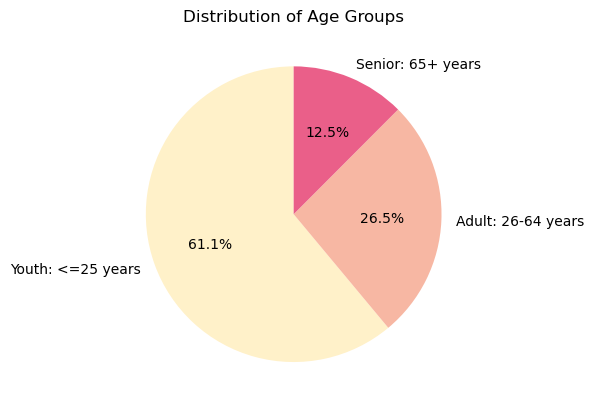

In [48]:
# Visualize a pie chart 
AgeGroup_PieChart = Count_AgeGroup.plot.pie(autopct='%1.1f%%', labels= ['Youth: <=25 years', 'Adult: 26-64 years', 'Senior: 65+ years'], startangle=90, colors=['#FFF1C9','#F7B7A3','#EA5F89'])
plt.title('Distribution of Age Groups')
# Hide the y-label
plt.ylabel('')
plt.show()

In [50]:
# Export the Pie chart
AgeGroup_PieChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AgeGroup_PieChart.png'))

In [52]:
# Generate an Income Group Variable
Updated_df.loc[Updated_df['Income'] <= 50000, 'Income Group'] = 'LOW'
Updated_df.loc[(Updated_df['Income'] > 50000) & (Updated_df['Income'] <= 150000), 'Income Group'] = 'MIDDLE'
Updated_df.loc[Updated_df['Income'] > 150000, 'Income Group'] = 'HIGH'

/var/folders/zl/tcc09dfs4v13063yfphqmzjr0000gn/T/ipykernel_2721/3196235115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updated_df.loc[Updated_df['Income'] <= 50000, 'Income Group'] = 'LOW'


In [54]:
# Verify the Income Group Variable
Count_IncomeGroup = Updated_df['Income Group'].value_counts(dropna = False)

In [56]:
Count_IncomeGroup

Income Group
MIDDLE    23707476
HIGH       3894534
LOW        3362554
Name: count, dtype: int64

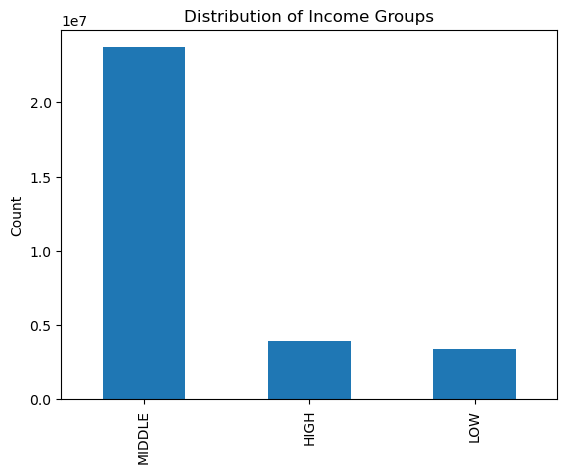

In [58]:
# Visualize a bar chart 
IncomeGroup_BarChart = Count_IncomeGroup.plot.bar()  
plt.title('Distribution of Income Groups')
# Hide the y-label
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [62]:
# Export the bar chart
IncomeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'IncomeGroup_BarChart.png'))

In [76]:
Updated_df.columns


Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income', 'Region',
       'Customer_Activity', 'Age Group', 'Income Group'],
      dtype='object')

In [78]:
# Generate a dependent flag variablke
Updated_df.loc[Updated_df['Number of Dependents'] == 0, 'dependents_flag'] = 'No Dependents'
Updated_df.loc[Updated_df['Number of Dependents'] >= 1, 'dependents_flag'] = 'Has Dependents'

/var/folders/zl/tcc09dfs4v13063yfphqmzjr0000gn/T/ipykernel_2721/2964164468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Updated_df.loc[Updated_df['Number of Dependents'] == 0, 'dependents_flag'] = 'No Dependents'


In [80]:
# Verify the Dependent Variable
Count_DependentGroup = Updated_df['dependents_flag'].value_counts(dropna = False)

In [82]:
Count_DependentGroup

dependents_flag
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

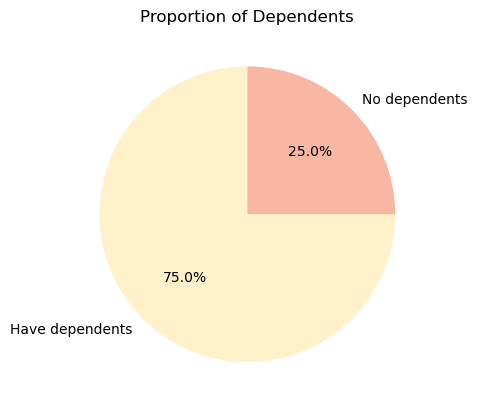

In [86]:
# Visualize a pie chart
DependentGroup_PieChart = Count_DependentGroup.plot.pie(autopct='%1.1f%%', labels= ['Have dependents', 'No dependents'], startangle=90, colors=['#FFF1C9','#F7B7A3'])
# Hide the y-label
plt.ylabel('')  
plt.title('Proportion of Dependents')
plt.show()

In [88]:
# Export the pie chart
DependentGroup_PieChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'DependentGroup_PieChart.png'))

In [90]:
# Using crosstab functiion on loyalty_flag and Age Group
Crosstab_LoyaltyAgeGroup = pd.crosstab(Updated_df['loyalty_flag'], Updated_df['Age Group'], dropna = False)

In [92]:
Crosstab_LoyaltyAgeGroup

Age Group,Adults,Senior,Youth
loyalty_flag,,,
Loyal customer,6279684,2723958,1280451
New customer,2927178,1276659,599858
Regular customer,9697640,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

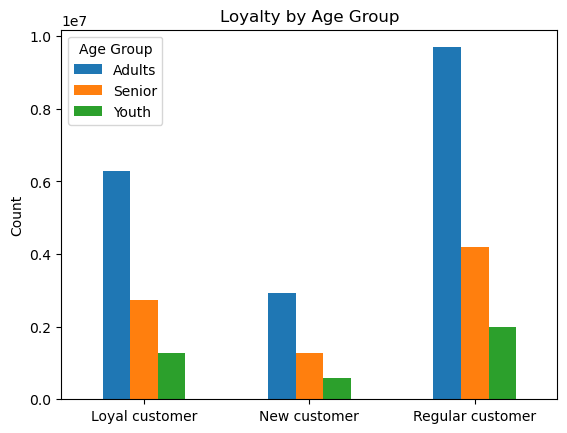

In [94]:
# Visualize a bar chart for the crosstab between loyalty_flag and Age Group
LoyaltyAgeGroup_BarChart = Crosstab_LoyaltyAgeGroup.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [96]:
# Export the Bar Chart
LoyaltyAgeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'LoyaltyAgeGroup_BarChart.png'))

In [98]:
# Using crosstab functiion on spender_flag and Age Group
Crosstab_SpenderAgeGroup = pd.crosstab(Updated_df['spender_flag'], Updated_df['Age Group'], dropna = False)

In [100]:
Crosstab_SpenderAgeGroup

Age Group,Adults,Senior,Youth
spender_flag,,,
High_spender,59182,26879,11382
Low_spender,18845320,8168665,3853136


(array([0, 1]), [Text(0, 0, 'High_spender'), Text(1, 0, 'Low_spender')])

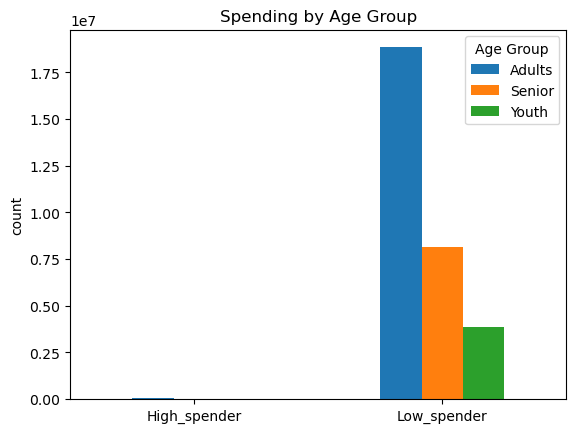

In [104]:
# Visualize a bar chart for the crosstab between spender_flag and Age Group
SpenderAgeGroup_BarChart = Crosstab_SpenderAgeGroup.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [106]:
# Export the Bar Chart
SpenderAgeGroup_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'SpenderAgeGroup_BarChart.png'))

#### Import Department Dataframe

In [111]:
# Importing Dataframe
Df_Department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [113]:
Df_Department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [115]:
# Rename the unnamed column to deptment_id
Df_Department.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [117]:
# Merge the Df_Department and Updated_df to analyze the departments against age groups, income levels and products
Df_Merged = Updated_df.merge(Df_Department, on = 'department_id', indicator = 'created')

In [119]:
# Export the new dataframe (Df_Merged) where we have data from orders, customers, products and departments
Df_Merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

In [121]:
# Visualize a bar chart of Products ordered by Department
BarChart_Department = Df_Merged['department'].value_counts(ascending = True)

In [123]:
BarChart_Department

department
bulk                 33451
other                34411
missing              64768
pets                 93060
alcohol             144627
international       255991
babies              410392
personal care       424306
breakfast           670850
meat seafood        674781
household           699857
dry goods pasta     822136
deli               1003834
canned goods       1012074
bakery             1120828
pantry             1782705
frozen             2121731
beverages          2571901
snacks             2766406
dairy eggs         5177182
produce            9079273
Name: count, dtype: int64

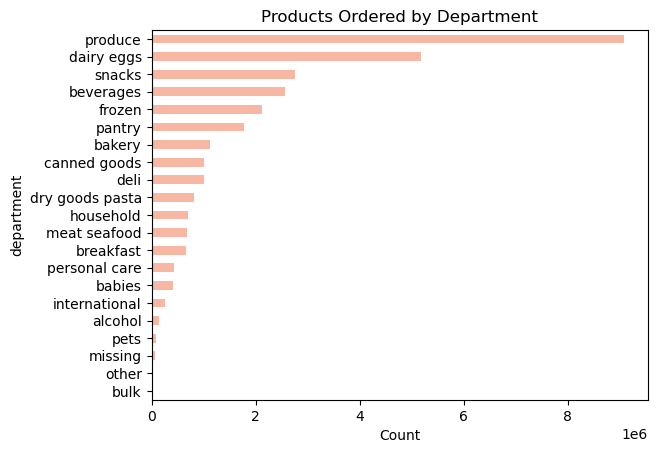

In [135]:
Department_Products = BarChart_Department.plot(kind = 'barh', color = 'F7B7A3', xlabel = 'Count', title='Products Ordered by Department')

In [137]:
# Export bar chart
Department_Products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'BarChart_Department.png'))

In [141]:
Df_Merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income', 'Region',
       'Customer_Activity', 'Age Group', 'Income Group', 'dependents_flag',
       'department', 'created'],
      dtype='object')

In [143]:
# Using crosstab functiion on department and Age Group
Cross_DepartmentAgeGroup = pd.crosstab(Df_Merged['Age Group'], Df_Merged['department'], dropna = False)

In [145]:
Cross_DepartmentAgeGroup

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Age Group,,,,,,,,,,,,,,,,,,,,,
Adults,88746,252954,684958,1569538,410077,20200,618253,3161617,614080,500622,...,426413,156418,409051,39470,21009,1088236,260258,55327,5543443,1692241
Senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
Youth,19188,51234,139873,318343,85477,4306,126312,647493,124555,104198,...,86814,32374,84580,8383,4456,222086,52996,12618,1127726,345616


In [151]:
# Using crosstab functiion on department and Income
Cross_IncomeAgeGroup = pd.crosstab(Df_Merged['Income Group'], Df_Merged['department'], dropna = False)

In [153]:
Cross_IncomeAgeGroup

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Income Group,,,,,,,,,,,,,,,,,,,,,
HIGH,24067,53001,148430,313325,83418,3671,132389,659149,125886,106335,...,92674,32822,91514,8253,4554,231915,53530,12991,1134490,305779
LOW,18047,29240,106757,383121,91408,4676,78975,502363,106448,64481,...,87216,21636,34278,6547,3886,166061,47782,8612,826314,559529
MIDDLE,102513,328151,865641,1875455,496024,25104,800710,4015670,771500,651320,...,519967,201533,548989,49968,25971,1384729,322994,71457,7118469,1901098


#### Since here we have more than 10 columns in the three different category. Visualizing a chart for it is redundant, as the final presentation for the client should be simple and easy to understand in order to make clear decisions.

## Use Aggregation Functions on customer profile level for usage frequency and expenditure

In [161]:
Df_Merged.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spend,Customer_frequency,Age,Number of Dependents,Income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790481e+00,3.442569e+01,7.790481e+00,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240270e+00,2.489504e+01,7.215688e-01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.385092e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.812069e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.224000e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [163]:
# Aggregation function on variables for customer profiles for expenditure
Df_Merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

order_number                prices               
                 max min       mean    max  min      mean
user_id                                                  
1                 10   1   5.813559   14.0  1.0  6.367797
2                 14   1   8.035897   14.8  1.3  7.515897
3                 12   1   6.000000   14.4  1.3  8.197727
4                  5   1   2.888889   14.6  1.4  8.205556
7                 20   1   9.645631   23.2  1.1  7.466990
...              ...  ..        ...    ...  ...       ...
206203             5   1   2.983193   25.0  1.0  7.138655
206206            67   1  38.007018   14.8  1.1  7.646667
206207            16   1   8.116592   24.7  1.2  7.313453
206208            49   1  25.505170   21.6  1.1  8.366617
206209            13   1   6.937984   18.8  1.1  7.058915

[162631 rows x 6 columns]

In [165]:
# Aggregation function on variables for customer profiles for Frequency
Df_Merged.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
206203             5   1   2.983193                   30.0  27.0  29.103093
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[162631 rows x 6 columns]

### Region and Department based comparison between customer profiles

In [170]:
# Using crosstab functiion on Region and Department
Cross_RegionDepartment = pd.crosstab(Df_Merged['Region'], Df_Merged['department'], dropna = False)

In [172]:
Cross_RegionDepartment

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


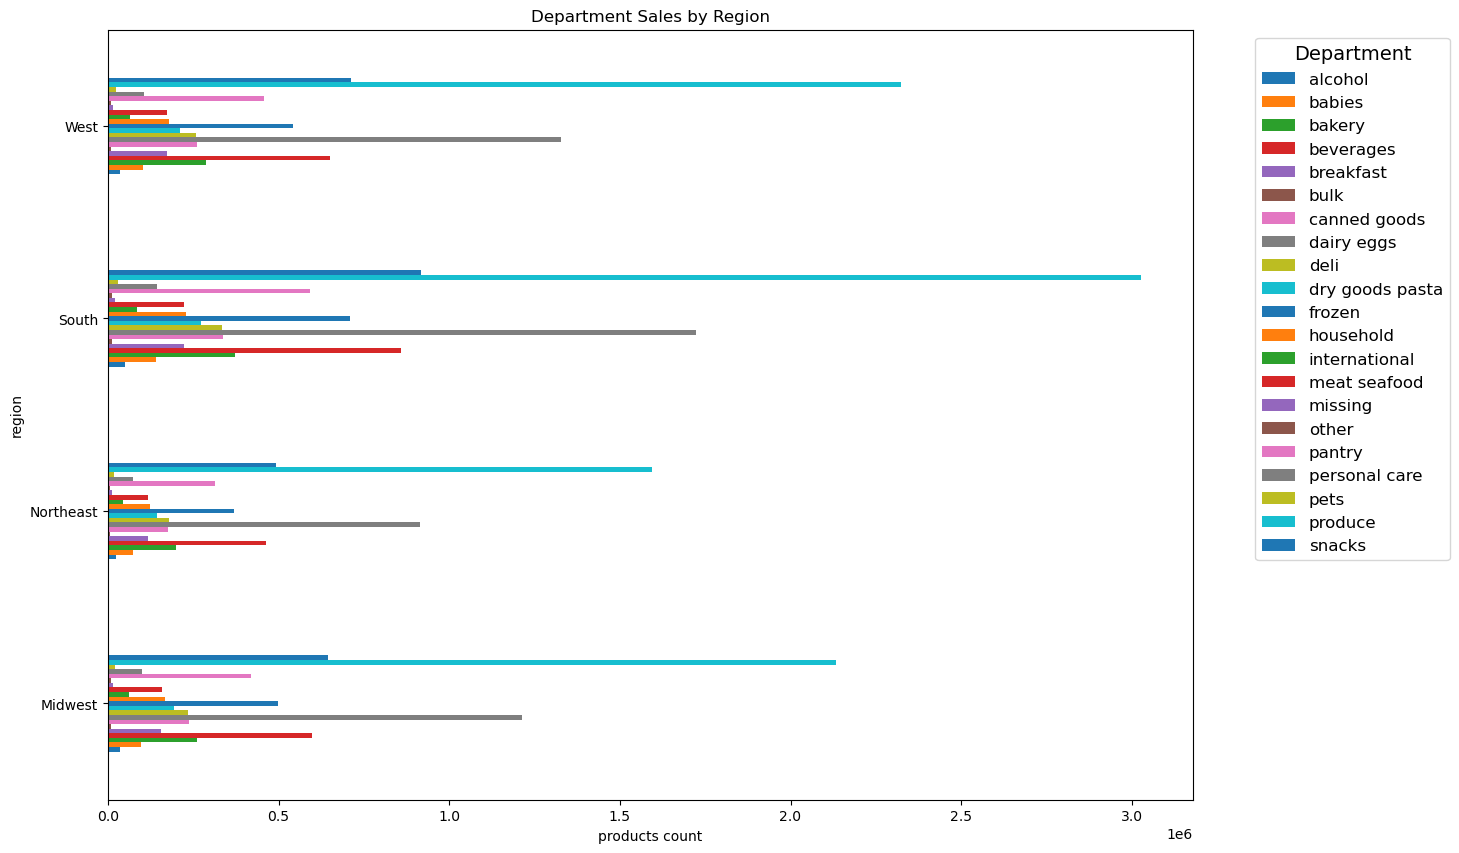

In [174]:
# Visualize a bar chart of Products ordered by Department across different regions
BarChart_RegionDepartment = Cross_RegionDepartment.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')


# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [176]:
# Export bar chart
BarChart_RegionDepartment.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'BarChart_RegionDepartment.png'))

In [198]:
# Visualize orders by Day of Week
BarChart_DOW = Df_Merged['orders_day_of_week'].value_counts()

In [200]:
BarChart_DOW

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

Text(0.5, 0, '')

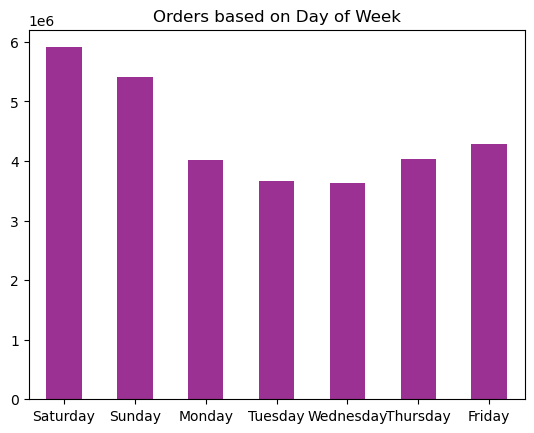

In [296]:
# Visualize a Bar Chart of orders by Day of Week
BarChart_DOW = Df_Merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = '#9B3192')
OrdersBarChart_DayOfWeek = BarChart_DOW.set_title('Orders based on Day of Week')
BarChart_DOW.set_xticklabels([ 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=0)
BarChart_DOW.set_xlabel("")

In [298]:
# Export the bar chart
OrdersBarChart_DayOfWeek.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'OrdersBarChart_DayOfWeek.png'))

Text(0.5, 0, 'Hour of Day (24 hr clock)')

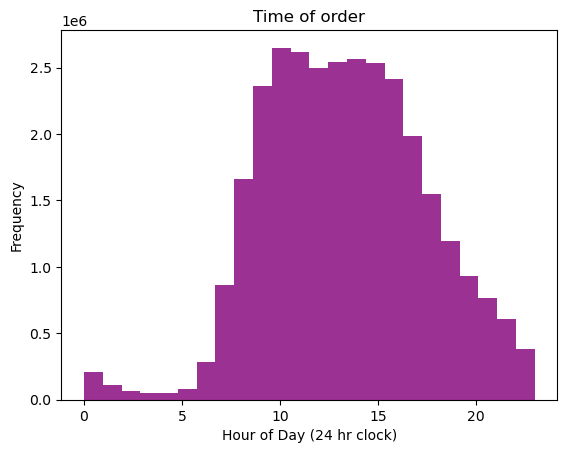

In [234]:
# Visualize a histogram for Time of Order 
TimeOfDay_Histogram = Df_Merged['order_hour_of_day'].plot.hist(bins = 24, color = '#9B3192')
plt.title('Time of order')
plt.xlabel('Hour of Day (24 hr clock)')

In [236]:
# Export the histogram
TimeOfDay_Histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'TimeOfDay_Histogram.png'))

In [242]:
# Using Crosstab function on loyalty with age group
Cross_LoyaltyIncome = pd.crosstab(Df_Merged['loyalty_flag'], Df_Merged['Income Group'], dropna = False)

In [244]:
Cross_LoyaltyIncome

Income Group,HIGH,LOW,MIDDLE
loyalty_flag,,,
Loyal customer,1310941,1032934,7940218
New customer,575272,627180,3601243
Regular customer,2008321,1702440,12166015


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

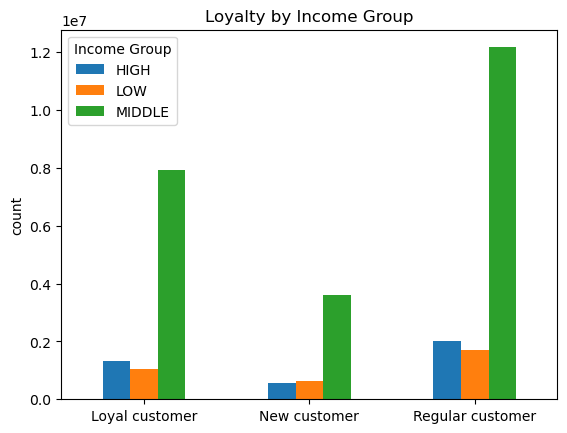

In [246]:
# Visualize a bar chart on loyalty across different Income  Groups
BarChart_LoyaltyIncome = Cross_LoyaltyIncome.plot.bar()
plt.title('Loyalty by Income Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [248]:
# Export the Bar Chart
BarChart_LoyaltyIncome.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_income_group_bar.png'))

In [252]:
# Using Crosstab function on loyalty with spending
Cross_LoyaltySpending = pd.crosstab(Df_Merged['loyalty_flag'], Df_Merged['spender_flag'], dropna = False)

In [254]:
Cross_LoyaltySpending

spender_flag,High_spender,Low_spender
loyalty_flag,,
Loyal customer,13896,10270197
New customer,36362,4767333
Regular customer,47185,15829591


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

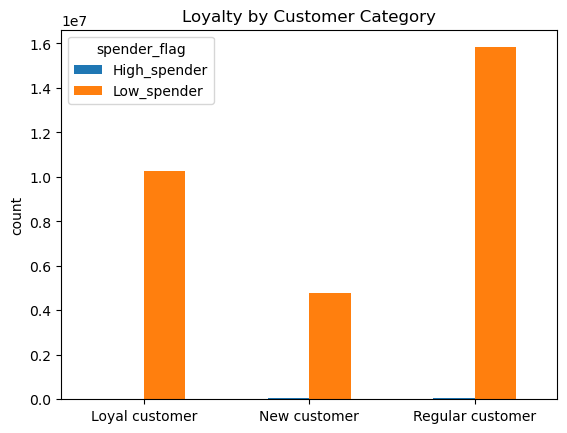

In [258]:
# Visualize a Bar Chart Loyalty across customers base
BarChart_LoyaltySpender = Cross_LoyaltySpending.plot.bar()
plt.title('Loyalty by Customer Category')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [260]:
# Export the Bar chart
BarChart_LoyaltySpender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'BarChart_LoyaltySpender.png'))

In [262]:
# Using Crosstab function on loyalty with Family Status
Cross_LoyaltyFamilyStatus = pd.crosstab(Df_Merged['loyalty_flag'], Df_Merged['Family Status'], dropna = False)

In [264]:
Cross_LoyaltyFamilyStatus

Family Status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,882722,492749,7202500,1706122
New customer,403781,221779,3380651,797484
Regular customer,1358768,766644,11160560,2590804


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

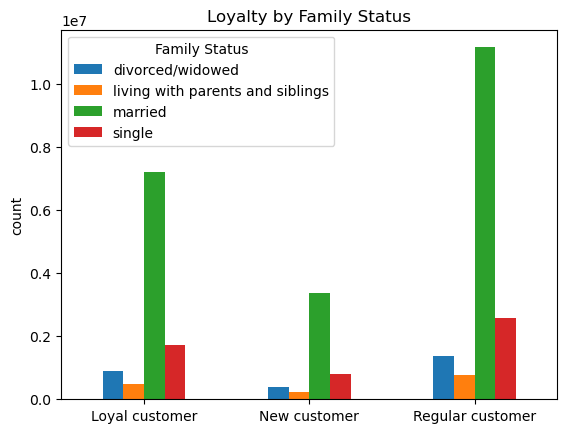

In [266]:
# Visualize a Bar Chart Loyalty across different family status of customers
BarChart_LoyaltyFamilyStatus = Cross_LoyaltyFamilyStatus.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [268]:
# Export the Bar Chart
BarChart_LoyaltyFamilyStatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'BarChart_LoyaltyFamilyStatus.png'))

In [286]:
# Check value counts for Family Status 
FamilyStatus = Df_Merged['Family Status'].value_counts(dropna = False)

In [288]:
FamilyStatus

Family Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

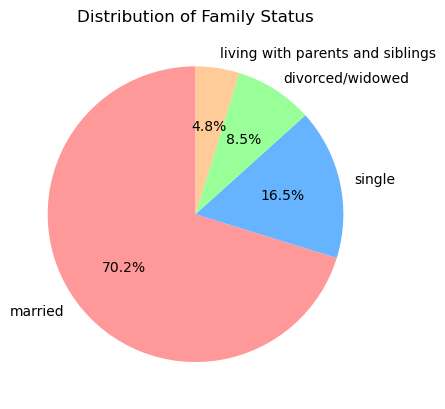

In [290]:
# Visualize a pie chart
PieChart_FamilyStatus = FamilyStatus.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
# Hide the y-label
plt.ylabel('')  
plt.title('Distribution of Family Status')
plt.show()

In [274]:
# Using Crosstab function on loyalty with Dependents
Cross_LoyaltyDependents = pd.crosstab(Df_Merged['loyalty_flag'], Df_Merged['dependents_flag'], dropna = False)

In [276]:
Cross_LoyaltyDependents

dependents_flag,Has Dependents,No Dependents
loyalty_flag,,
Loyal customer,7695249,2588844
New customer,3602430,1201265
Regular customer,11927204,3949572


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

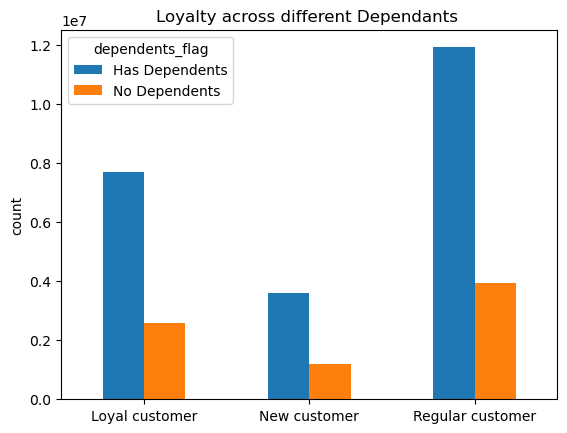

In [280]:
# Visualize a Bar Chart Loyalty across different family status of customers
BarChart_LoyaltyDependents = Cross_LoyaltyDependents.plot.bar()
plt.title('Loyalty across different Dependants ')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [282]:
# Export the Bar Chart
BarChart_LoyaltyDependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'BarChart_LoyaltyDependents.png'))

In [304]:
# Verify the Family Status Variable
Count_FamilyStatus = Updated_df['Family Status'].value_counts(dropna = False)

In [306]:
Count_FamilyStatus

Family Status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

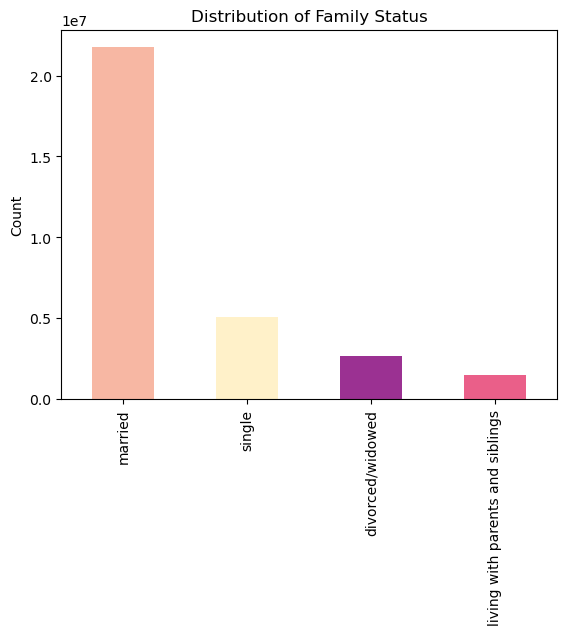

In [320]:
FamilyStatus_BarChart = Count_FamilyStatus.plot.bar(color = {'#9B3192','#FFF1C9', '#F7B7A3', '#EA5F89'})  
plt.title('Distribution of Family Status')
# Hide the y-label
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [324]:
# Export the Bar Chart
FamilyStatus_BarChart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FamilyStatus_BarChart.png'))

In [326]:
# The End of the code.